# In-Class K-means Clustering
Unisse Chua

In [1]:
import numpy as np
import pylab as pl
import time
from IPython.display import display, clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)

In [3]:
random_1=np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

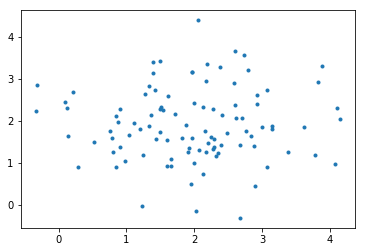

In [6]:
pl.plot(random_2[0], random_2[1],'.')

### Figure 1. Random points
Just a bunch of random points generated for clustering example.

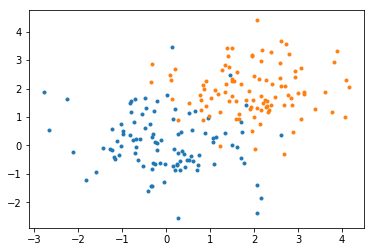

In [7]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')

### Figure 2. Two sets random points

Two sets of random points to see how they can be clustered using k-means clustering.

In [8]:
clusters=2

In [9]:
random_stack = np.hstack([random_1, random_2])

In [10]:
min(random_stack[0]), max(random_stack[0])

centers = np.array([[0.,-1.], [0,-2]]) 
#np.array((np.random.rand(4)   * (max(random_stack[0]) - min(random_stack[0]))) + min(random_stack[0])).reshape(2,2)

Text(0,0.5,'y')

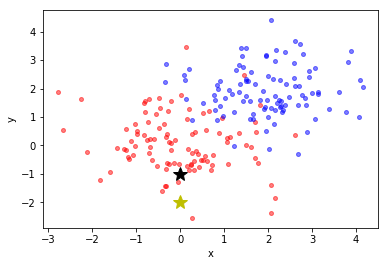

In [11]:
pl.plot(random_1[0], random_1[1],'r.', ms=8, alpha=0.5)
pl.plot(random_2[0], random_2[1],'b.', ms=8, alpha=0.5)
pl.plot(centers[0,0], centers[0,1],'k*', ms=15)
pl.plot(centers[1,0], centers[1,1],'y*', ms=15)
pl.xlabel('x')
pl.ylabel('y')

### Figure 3. Two random set of points with initial centers
Same as Figure 2, only with the stars as the initial centers of the clusters.

In [12]:
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [13]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

In [14]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
centers, newc

(array([[ 0., -1.],
        [ 0., -2.]]), array([[ 0.96972306,  1.06522176],
        [ 1.02400655, -2.10176012]]))

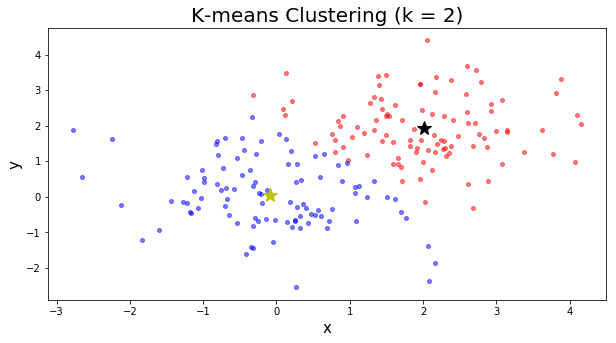

7
[[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


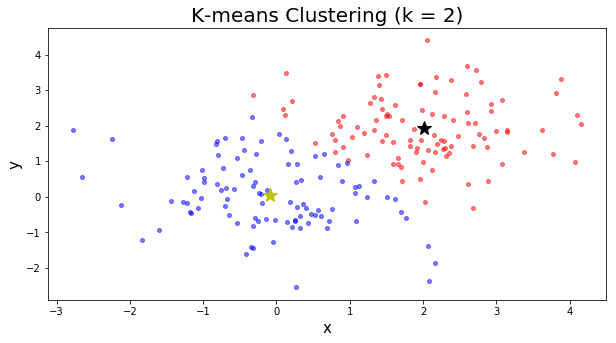

array([ 2.01522567,  1.93589473])

In [15]:
it = 0

fig, ax = plt.subplots(figsize=(10,5))

l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                      np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.', ms=8, alpha=0.5)
l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.', ms=8, alpha=0.5)
l3, = ax.plot(centers[0,0], centers[0,1], 'k*', ms=15)
l4, = ax.plot(centers[1,0], centers[1,1], 'y*', ms=15)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('K-means Clustering (k = 2)', fontsize=20)

display(fig)

while (not (centers == newc).all()) or it > 10:
    centers = newc
    
    l1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                  np.hstack([random_1[:, cl1], random_2[:, cl2]])[1])
    l2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1])
    l3.set_data(centers[0,0], centers[0,1])
    l4.set_data(centers[1,0], centers[1,1])
    
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
    
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                     np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print(it)
    print (centers, newc)
    it += 1

plt.show()
newc[0]

### Figure 4. K-means Clustering in Practice
When run, this shows the process of the K-means clustering technique where the centers "move" after every iteration until a certain convergence. In this case, the convergence rule is set to when the centers of the previous iteration and the centers of the current iteration is the same or when it reaches 10 iterations.

This plot shows the result of the K-means clustering with two clusters.